# Exploratory Data Analysis on Evictions in L.A.

In [111]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the CSV file into a DataFrame
# file_path = '/drive/Shareddrives/data_science_colabs/la_evictions_2023_07.csv'

file_path = '../data/Eviction Data Feb - July 2023.csv'
df = pd.read_csv(file_path)

df.head()

,Category,Notice Date,Received,Address,City,Zip Code,CD#,Rent Owed,Bedroom Count,Notice Type,Just Cause
0,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,850.00",NaN,3 Day,Non-payment of rent
1,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,800.00",NaN,3 Day,Non-payment of rent
2,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,500.00",NaN,3 Day,Non-payment of rent
3,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,866.78",NaN,3 Day,Non-payment of rent
4,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,742.97",NaN,3 Day,Non-payment of rent


In [112]:
df.shape

(39677, 11)

In [113]:
df.isna().sum()

Category            0
Notice Date         0
Received            0
Address             0
City                0
Zip Code            2
CD#               598
Rent Owed           0
Bedroom Count    6507
Notice Type         0
Just Cause          9
dtype: int64

In [114]:
df.groupby(df['Category']).Category.count()

Category
At-Fault    39631
No-Fault       46
Name: Category, dtype: int64

Analyzing At-Fault category first, since No-Fault is very small compared to At-Fault category.

In [115]:
df[df['Category']=='At-Fault'].groupby(df['Just Cause'])['Just Cause'].count()

df[df['Category']=='At-Fault'].groupby(df['Notice Type'])['Notice Type'].count()

Notice Type
10 Day      459
15 Day        1
3 Day     37080
30 Day     2014
60 Day       62
90 Day       15
Name: Notice Type, dtype: int64

In [116]:
comb_cat = df[df['Category']=='At-Fault'].groupby(df['Just Cause'])['Just Cause'].count()

all_cat = set()
ml = -1
for e in comb_cat.index:
    if ml<len(e.split(',')):
        ml = len(e.split(','))
        print(e)
        all_cat.update(e.split(','))
print(ml)
all_cat = sorted(all_cat)
print(all_cat)

Criminal activity
Criminal activity, Disorderly behavior/disturbing the peace (Nuisance), Violation of the rental agreement or lease
Damage to the rental unit, Disorderly behavior/disturbing the peace (Nuisance), Refuse access to the apartment when requested in accordance with law, Unapproved subtenant at the end of the lease/tenancy
Non-payment of rent, Damage to the rental unit, Disorderly behavior/disturbing the peace (Nuisance), Refusal to renew a lease or rental agreement of like terms and conditions, Unapproved subtenant at the end of the lease/tenancy
Non-payment of rent, Violation of the rental agreement or lease, Damage to the rental unit, Disorderly behavior/disturbing the peace (Nuisance), Refusal to renew a lease or rental agreement of like terms and conditions, Refuse access to the apartment when requested in accordance with law, Criminal activity
Non-payment of rent, Violation of the rental agreement or lease, Damage to the rental unit, Disorderly behavior/disturbing the 

In [119]:
def check_categories(cause, cat):
    if cause and isinstance(cause, str) and cat in cause:
        return cat
    else:
        return None


for j,cat in enumerate(all_cat):
    df['cat{}'.format(j)] = df['Just Cause'].apply(lambda x: check_categories(x, cat))

df.head()

,Category,Notice Date,Received,Address,City,Zip Code,CD#,Rent Owed,Bedroom Count,Notice Type,Just Cause,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,850.00",NaN,3 Day,Non-payment of rent,None,None,None,None,None,None,None,None,None,Non-payment of rent
1,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,800.00",NaN,3 Day,Non-payment of rent,None,None,None,None,None,None,None,None,None,Non-payment of rent
2,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,500.00",NaN,3 Day,Non-payment of rent,None,None,None,None,None,None,None,None,None,Non-payment of rent
3,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,866.78",NaN,3 Day,Non-payment of rent,None,None,None,None,None,None,None,None,None,Non-payment of rent
4,At-Fault,2/3/2023,2/3/2023,7367 Hollywood Blvd,Los Angeles,90046,4.0,"$1,742.97",NaN,3 Day,Non-payment of rent,None,None,None,None,None,None,None,None,None,Non-payment of rent


In [120]:
# Flatten the cat0 to cat9 columns into a single Series
cat_columns = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
flattened_cats = df[cat_columns].values.flatten()

# Create a DataFrame for the flattened data
cat_df = pd.DataFrame(flattened_cats, columns=['Category'])

# Count the occurrences of each category
cat_counts = cat_df['Category'].value_counts()


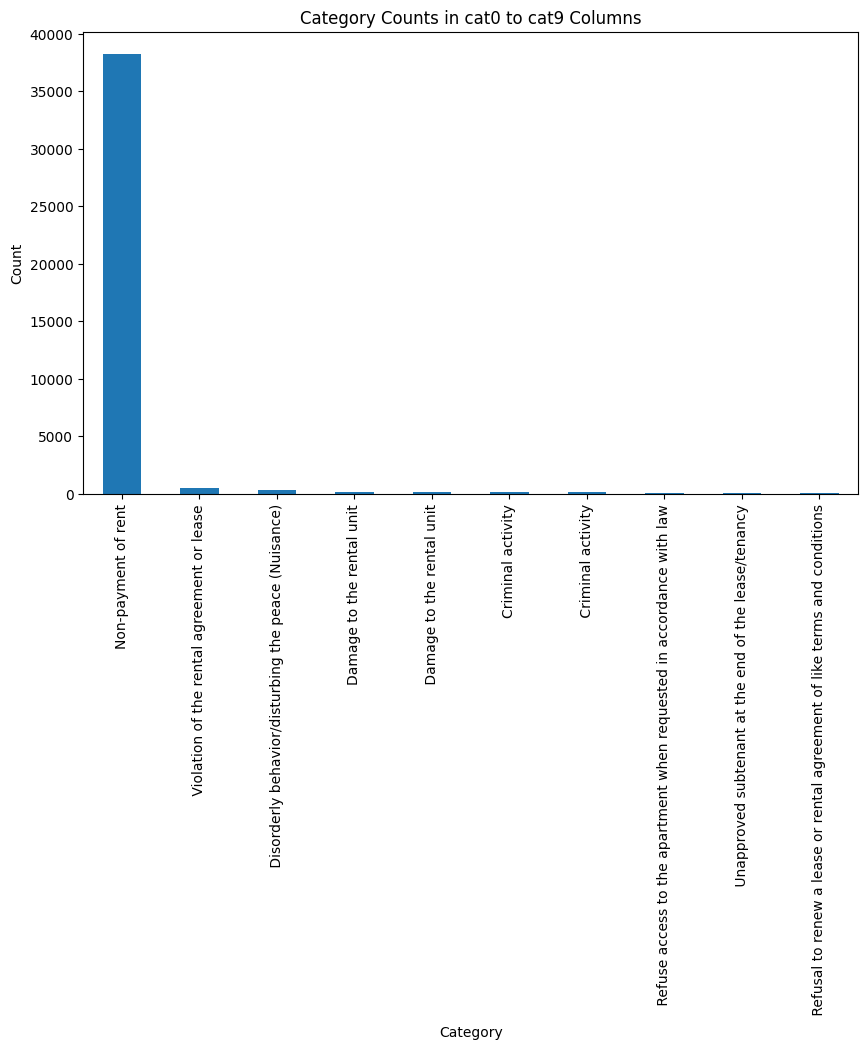

In [122]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
cat_counts.plot(kind='bar')
plt.title('Category Counts in cat0 to cat9 Columns')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()
